# Import library

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from cleanlab.filter import find_label_issues

2024-05-22 13:10:24.440085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 13:10:24.611558: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 13:10:25.396671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-22 13:10:25.396762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

# Generator for combine data

In [3]:
def combine_generators(COMBINE_DIR,
                         batch_size = 32,
                         target_size=(224, 224),
                         shuffle_test=False
                         ):
  
  # Instantiate the ImageDataGenerator class 
  # Don't forget to normalize pixel values and set arguments to augment the images 
  combine_datagen = ImageDataGenerator()

  combine_generator = combine_datagen.flow_from_directory(directory=COMBINE_DIR,
                                                                batch_size=batch_size, 
                                                                class_mode='categorical',
                                                                target_size=target_size, shuffle=shuffle_test)


  ### END CODE HERE
  return combine_generator

In [5]:
COMBINATION_DIR="/raid/rhendiya/KP_dan_TA/Skripsi/Dataset Kombinasi"
combine_generator = combine_generators(COMBINATION_DIR)
combine_generator_1 = combine_generators(COMBINATION_DIR, target_size=(331, 331))


Found 8271 images belonging to 4 classes.
Found 8271 images belonging to 4 classes.


In [6]:
def track_wrong(model_path, preprocess_input_m, data_generator):
    model=tensorflow.keras.models.load_model(model_path)
    testing_generator_x = preprocess_input_m(data_generator)
    test_score = model.evaluate(testing_generator_x, verbose=0)
    pred_probs=model.predict(testing_generator_x)
    y=testing_generator_x.labels
    ranked_label_issues = find_label_issues(y,pred_probs,
    return_indices_ranked_by="self_confidence")
    print(f"Cleanlab found {len(ranked_label_issues)} label issues.")
    print(f"Top 15 most likely label errors: \n {ranked_label_issues[:15]}")
    issue=ranked_label_issues[:15]
    testing_filepath=testing_generator_x.filepaths
    issue_img_path=[testing_filepath[i] for i in issue]
    class_index=list(testing_generator_x.class_indices.keys())
    ncols=5
    nrows=3
    fig = plt.gcf()
    fig.set_size_inches(ncols*4, nrows*4)


    for i, img_path in enumerate(issue_img_path):
    # Set up subplot; subplot indices start at 1
        id = issue[i]
        predicted_label=np.argmax(pred_probs[id])
        given_label=y[id]
        predicted_probablity=dict(zip(class_index, pred_probs[id]))
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)

        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f"id: {id} \n predicted label: {predicted_label} ({class_index[predicted_label]}) \n given label: {given_label} ({class_index[given_label]})")
        plt.tight_layout()
        print("id {} which filepath is \n{} \n is predicted as {} ({}) is labeled as {} ({})\n with predicted probablity is \n{}\n".\
            format(id, img_path, predicted_label, class_index[predicted_label], given_label, class_index[given_label], predicted_probablity))

    plt.show()   

2024-05-22 13:12:13.779581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2024-05-22 13:12:13.780625: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-05-22 13:12:13.780902: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


259/259 [==============================] - 67s 255ms/step
Cleanlab found 17 label issues.
Top 15 most likely label errors: 
 [2133  931 2147 2108 2196 1155 2184 7185 2103 3862 3527 2203  718 1873
 1272]
id 2133 which filepath is 
/raid/rhendiya/KP_dan_TA/Skripsi/Dataset Kombinasi/glioma/Tr-gl_1161.jpg 
 is predicted as 1 (meningioma) is labeled as 0 (glioma)
 with predicted probablity is 
{'glioma': 3.7883823e-05, 'meningioma': 0.9987838, 'notumor': 3.2717264e-08, 'pituitary': 0.0011784108}

id 931 which filepath is 
/raid/rhendiya/KP_dan_TA/Skripsi/Dataset Kombinasi/glioma/Te-gl_0259.jpg 
 is predicted as 1 (meningioma) is labeled as 0 (glioma)
 with predicted probablity is 
{'glioma': 5.709615e-05, 'meningioma': 0.9818158, 'notumor': 1.5230069e-06, 'pituitary': 0.018125469}

id 2147 which filepath is 
/raid/rhendiya/KP_dan_TA/Skripsi/Dataset Kombinasi/glioma/Tr-gl_1175.jpg 
 is predicted as 1 (meningioma) is labeled as 0 (glioma)
 with predicted probablity is 
{'glioma': 0.0001589066

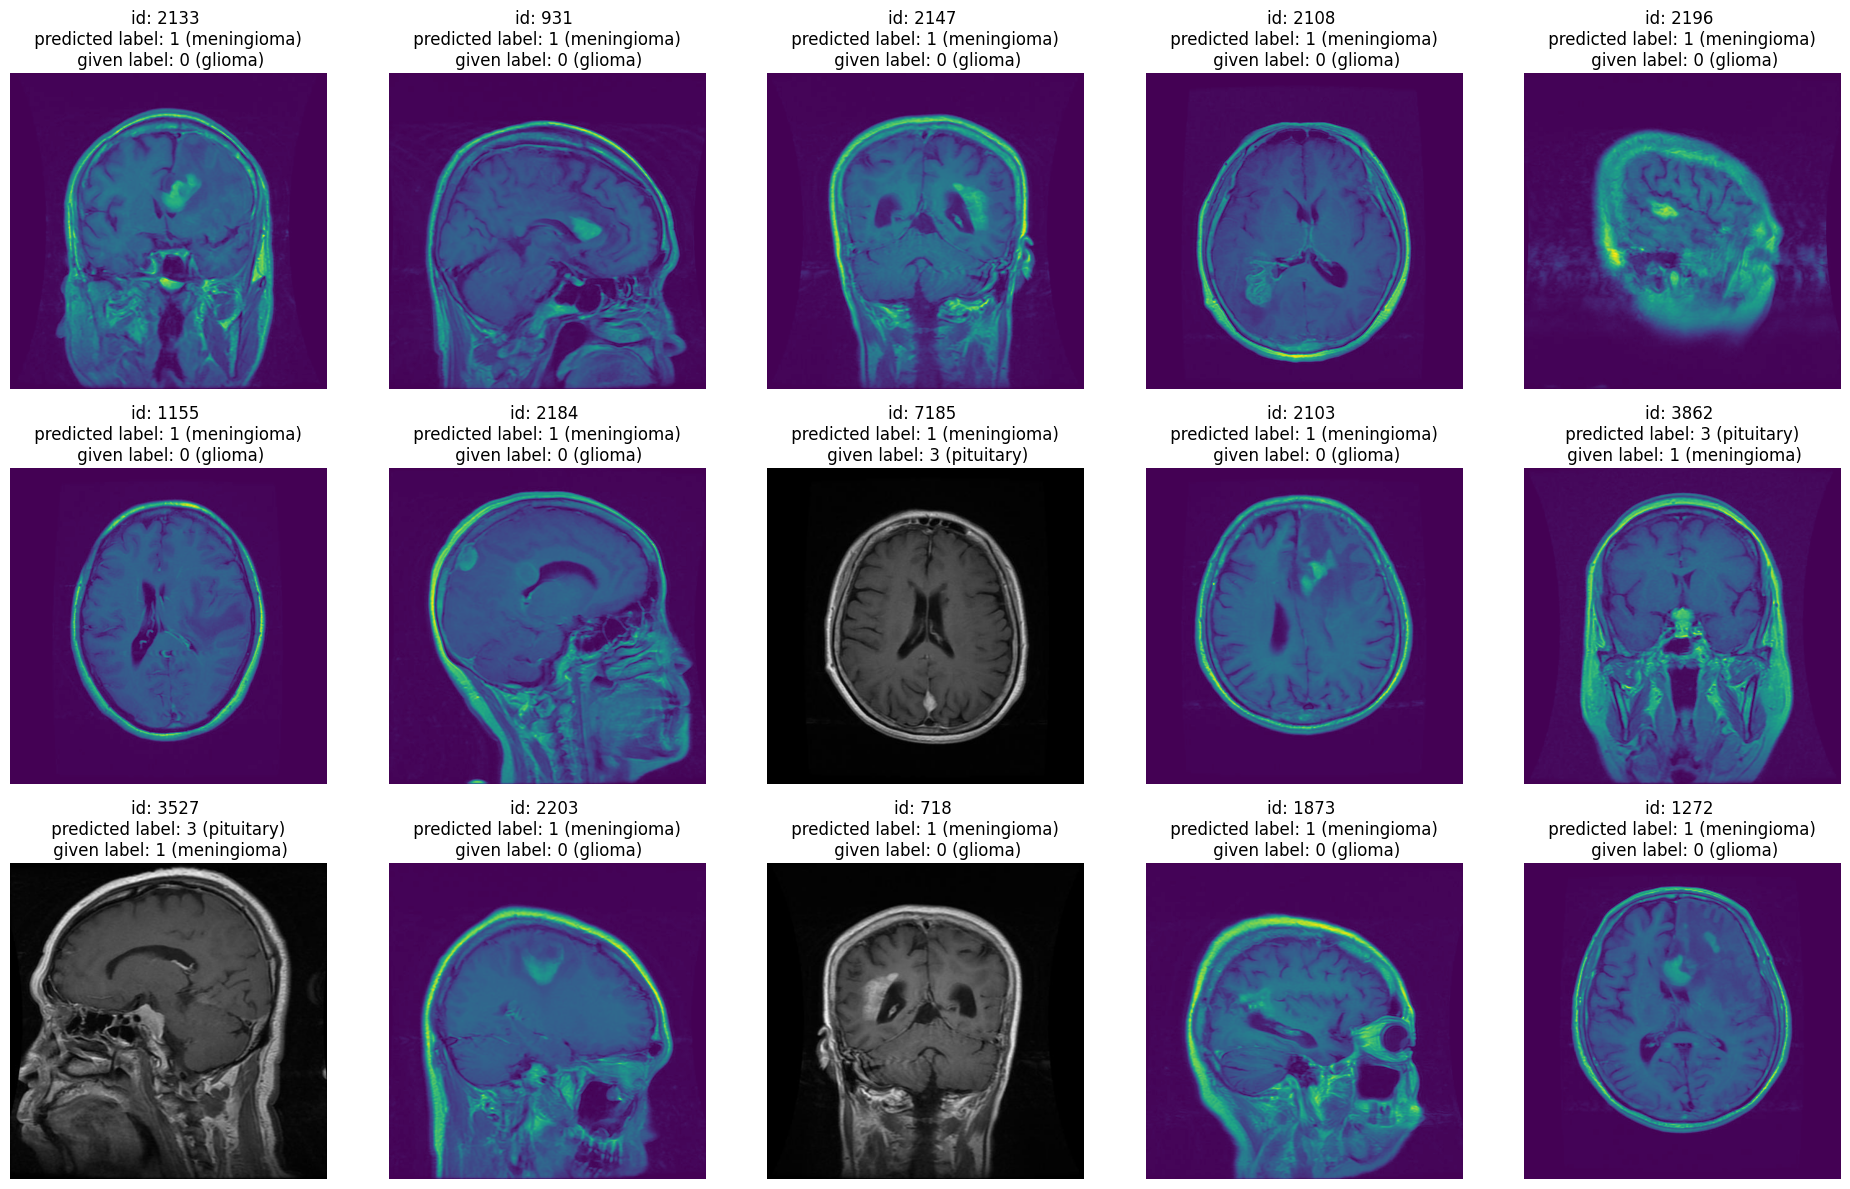

In [7]:
model_path='/raid/rhendiya/KP_dan_TA/Thesis/811/model/Model 4 (EfficientNetB0) Wednesday, 28 Feb 2024 22:07:31 +0700.h5'
preprocess_input_m=tensorflow.keras.applications.efficientnet.preprocess_input
track_wrong(model_path, preprocess_input_m, combine_generator)